In [4]:
%run python_helper.py
%matplotlib inline 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
input_str = open("fake_or_real_news_training.csv", encoding= 'utf-8')

In [6]:
noNewLines = re.sub("\n", "", input_str.read())

In [7]:
noNewLines = re.sub(",FAKE[,]+", ",FAKE,,\n", noNewLines)

In [8]:
noNewLines = re.sub(",REAL[,]+", ",REAL,,\n", noNewLines)

In [9]:
lines = noNewLines.split('\n')

In [10]:
def removeComma(g):
      t = g.groups()
      t = [t[0], t[1].replace(',', ' |'), t[2], t[3]]
      return "".join(t)

betweenQuotes = lambda line: re.sub(r'(.*,")(.*)(",)(.*)', lambda x: removeComma(x), line)

secondCol = lambda line: re.sub(r'^([0-9]+,)(.*,.*)(,\")(.*)$', lambda x: removeComma(x), line, 1)


lines = [betweenQuotes(l) for l in lines]
lines = [secondCol(l) for l in lines]

finalString = '\n'.join(lines)



In [12]:
file = open('fake_or_real_news_training_CLEANED.csv', 'w',encoding= 'utf-8')
file.write(finalString)
file.close()

In [11]:
train = pd.read_csv("fake_or_real_news_training_CLEANED.csv")
test = pd.read_csv("fake_or_real_news_test.csv")

In [12]:
len(train)

3997

In [13]:
len(test)

2321

In [14]:
train.head()

,ID,title,text,label,X1,X2
0,8476,You Can Smell Hillary’s Fear,Daniel Greenfield | a Shillman Journalism Fell...,FAKE,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King (@KaydeeKing) November 9 | 2016 ...,FAKE,NaN,NaN
4,875,The Battle of New York: Why This Primary Matte...,"Cruz promised his supporters. """"We're beating...",REAL,NaN,NaN


In [15]:
train = train.drop(['X1', 'X2'], axis=1)

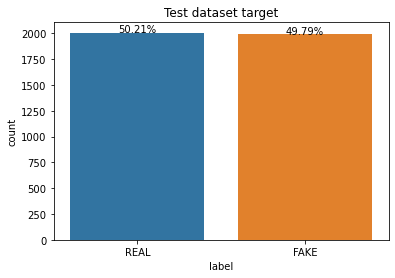

In [16]:
from collections import Counter
ax = sns.countplot(train.label, order=[x for x, count in sorted(Counter(train.label).items(), key=lambda x: -x[1])])


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center") 
ax.set_title("Test dataset target")
show()

In [17]:
test.head()

,ID,title,text
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...


In [18]:
test['label'] = None 

df = pd.concat([train, test])

In [19]:
len(df)

6318

In [20]:
df.tail()

,ID,title,text,label
2316,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,None
2317,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,None
2318,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,None
2319,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",None
2320,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,None


In [21]:
df['title_and_text'] = df['title'] +' '+ df['text']
df.tail()

,ID,title,text,label,title_and_text
2316,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,None,State Department says it can't find emails fro...
2317,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,None,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
2318,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,None,Anti-Trump Protesters Are Tools of the Oligarc...
2319,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",None,"In Ethiopia, Obama seeks progress on peace, se..."
2320,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,None,Jeb Bush Is Suddenly Attacking Trump. Here's W...


In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
df['preprocessed_text'] = df['title_and_text'].apply(lambda x: preprocess(x))

KeyboardInterrupt: 

In [ ]:
df.to_csv("fake_or_real_news_train_PREPROCESSED.csv", index=False)

In [ ]:
df = pd.read_csv("fake_or_real_news_train_PREPROCESSED.csv")
df = df.astype(object).replace(np.nan, 'None')

In [29]:
df.tail()

,ID,title,text,label,title_and_text,preprocessed_text
6313,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,None,State Department says it can't find emails fro...,state department say can't find emails clinton...
6314,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,None,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,‘p’ pb stand ‘plutocratic’ ‘pentagon’ ‘p’ pb s...
6315,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,None,Anti-Trump Protesters Are Tools of the Oligarc...,anti-trump protester tool oligarchy informatio...
6316,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",None,"In Ethiopia, Obama seeks progress on peace, se...",ethiopia obama seek progress peace security ea...
6317,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,None,Jeb Bush Is Suddenly Attacking Trump. Here's W...,jeb bush suddenly attack trump here's matter j...


In [30]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df)


Train dataset (Full)
(3997, 7)
Train dataset cols
['ID', 'title', 'text', 'label', 'title_and_text', 'preprocessed_text', 'encoded_label']

Train CV dataset (subset)
(2677, 7)
Train Holdout dataset (subset)
(1320, 7)

Test dataset
(2321, 6)
Test dataset cols
['ID', 'title', 'text', 'label', 'title_and_text', 'preprocessed_text']


In [31]:
encoder


LabelEncoder()

In [33]:
models = pd.DataFrame(columns=['model_name', 'model_object', 'score'])

In [34]:
count_vect = CountVectorizer(analyzer = "word")

count_vectorizer = count_vect.fit(df.preprocessed_text)

train_cv_vector = count_vectorizer.transform(train_cv.preprocessed_text)
train_holdout_vector = count_vectorizer.transform(train_holdout.preprocessed_text)
test_vector = count_vectorizer.transform(test.preprocessed_text)

In [35]:
count_vect.get_feature_names()[:10]

['___',
 '_blank',
 '_derosa',
 '_rt_op_edge',
 '_strauss',
 'aa',
 'aaa',
 'aaahhh',
 'aab',
 'aachen']

Baseline Model 1: SVC
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [10, 100, 500, 1000], 'gamma': [0.0001],
                          'kernel': ['rbf']}])

CV-scores
Accuracy: 0.909 (+/-0.022) for params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.902 (+/-0.030) for params: {'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.893 (+/-0.030) for params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.892 (+/-0.036) for params: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.892 (+/-0.036) for params: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.892 (+/-0.036) for params: {'C': 50, 'kernel': 'linear'}
Accuracy: 0.892 (+/-0.036) for params: {'C': 100, 'kernel': 'linear'}
Accuracy: 0.886 (+/-0.011) for params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


Best Estimator Params
SVC(C=100, gamma

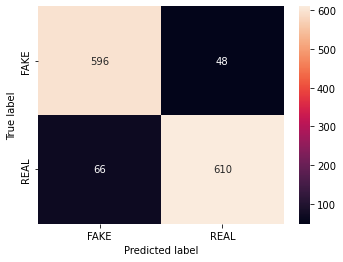


Accuracy:
0.9136363636363637


In [36]:
SVC_classifier = runModel(encoder,
               train_cv_vector,
               train_cv_label,
               train_holdout_vector,
               train_holdout.label,
               "svc",
               "Baseline Model 1: SVC")
models.loc[len(models)] = SVC

Baseline Model 2: Naiive Bayes
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=MultinomialNB(), param_grid={})

CV-scores
Accuracy: 0.887 (+/-0.021) for params: {}


Best Estimator Params
MultinomialNB()

Predictions:
['REAL' 'REAL' 'REAL' ... 'REAL' 'REAL' 'REAL']


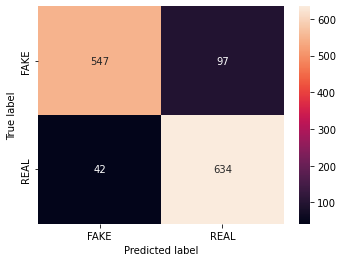


Accuracy:
0.8946969696969697


In [37]:
NB = runModel(encoder,
              train_cv_vector,
              train_cv_label,
              train_holdout_vector,
              train_holdout.label,
              "nb",
              "Baseline Model 2: Naiive Bayes")
models.loc[len(models)] = NB

Baseline Model 3: MaxEnt Classifier
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

CV-scores
Accuracy: nan (+/-nan) for params: {'C': 0.001, 'penalty': 'l1'}
Accuracy: 0.877 (+/-0.023) for params: {'C': 0.001, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 0.01, 'penalty': 'l1'}
Accuracy: 0.913 (+/-0.011) for params: {'C': 0.01, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 0.1, 'penalty': 'l1'}
Accuracy: 0.929 (+/-0.012) for params: {'C': 0.1, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.926 (+/-0.019) for params: {'C': 1, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 10, 'penalty': 'l1'}
Accuracy: 0.916 (+/-0.025) for params: {'C': 10, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 100,

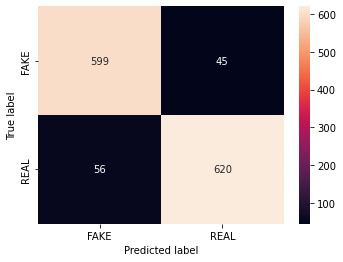


Accuracy:
0.9234848484848485


In [38]:
maxEnt = runModel(encoder,
              train_cv_vector,
              train_cv_label,
              train_holdout_vector,
              train_holdout.label,
              "maxEnt",
              "Baseline Model 3: MaxEnt Classifier")
models.loc[len(models)] = maxEnt

In [39]:
models

,model_name,model_object,score
0,<class 'sklearn.svm._classes.SVC'>,<class 'sklearn.svm._classes.SVC'>,<class 'sklearn.svm._classes.SVC'>
1,Baseline Model 2: Naiive Bayes,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.894697
2,Baseline Model 3: MaxEnt Classifier,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.923485


In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [42]:
df['pos_tagged_text'] = df['preprocessed_text'].apply(lambda x: pos_tag_words(x))

In [43]:
df.head()

,ID,title,text,label,title_and_text,preprocessed_text,pos_tagged_text
0,8476,You Can Smell Hillary’s Fear,Daniel Greenfield | a Shillman Journalism Fell...,FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillary’s fear daniel greenfield shillma...,NN-smell JJ-hillary NNP-’ NN-s NN-fear JJ-dani...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan commit political ...,NN-watch JJ-exact NN-moment NN-paul JJ-ryan NN...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,kerry go paris gesture sympathy u.s secretary ...,NN-kerry VBP-go JJ-paris NN-gesture JJ-sympath...
3,10142,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King (@KaydeeKing) November 9 | 2016 ...,FAKE,Bernie supporters on Twitter erupt in anger ag...,bernie supporter twitter erupt anger dnc try w...,NN-bernie NN-supporter NN-twitter JJ-erupt NN-...
4,875,The Battle of New York: Why This Primary Matte...,"Cruz promised his supporters. """"We're beating...",REAL,The Battle of New York: Why This Primary Matte...,battle new york primary matter primary day new...,NN-battle JJ-new NN-york JJ-primary NN-matter ...


In [44]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df, False)

count_vect = CountVectorizer(analyzer = "word")

count_vectorizer = count_vect.fit(df.preprocessed_text)

train_cv_vector = count_vectorizer.transform(train_cv.pos_tagged_text)
train_holdout_vector = count_vectorizer.transform(train_holdout.pos_tagged_text)
test_vector = count_vectorizer.transform(test.pos_tagged_text)

SVC on pos-tagged text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [10, 100, 500, 1000], 'gamma': [0.0001],
                          'kernel': ['rbf']}])

CV-scores
Accuracy: 0.921 (+/-0.026) for params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.914 (+/-0.020) for params: {'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.912 (+/-0.028) for params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.912 (+/-0.022) for params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.904 (+/-0.020) for params: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.904 (+/-0.020) for params: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.904 (+/-0.020) for params: {'C': 50, 'kernel': 'linear'}
Accuracy: 0.904 (+/-0.020) for params: {'C': 100, 'kernel': 'linear'}


Best Estimator Params
SVC(C=100, gamm

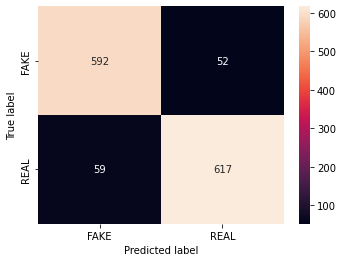


Accuracy:
0.9159090909090909


In [45]:
SVC_pos_tag = runModel(encoder,
               train_cv_vector,
               train_cv_label,
               train_holdout_vector,
               train_holdout.label,
               "svc",
               "SVC on pos-tagged text")
models.loc[len(models)] = SVC_pos_tag

Naiive Bayes on pos-tagged text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=MultinomialNB(), param_grid={})

CV-scores
Accuracy: 0.889 (+/-0.017) for params: {}


Best Estimator Params
MultinomialNB()

Predictions:
['REAL' 'REAL' 'REAL' ... 'REAL' 'REAL' 'REAL']


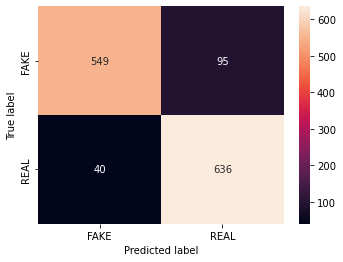


Accuracy:
0.8977272727272727


In [46]:
NB_pos_tag = runModel(encoder,
              train_cv_vector,
              train_cv_label,
              train_holdout_vector,
              train_holdout.label,
              "nb",
              "Naiive Bayes on pos-tagged text")
models.loc[len(models)] = NB_pos_tag

MaxEnt Classifier on pos-tagged text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

CV-scores
Accuracy: nan (+/-nan) for params: {'C': 0.001, 'penalty': 'l1'}
Accuracy: 0.885 (+/-0.012) for params: {'C': 0.001, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 0.01, 'penalty': 'l1'}
Accuracy: 0.917 (+/-0.018) for params: {'C': 0.01, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 0.1, 'penalty': 'l1'}
Accuracy: 0.930 (+/-0.023) for params: {'C': 0.1, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.931 (+/-0.027) for params: {'C': 1, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 10, 'penalty': 'l1'}
Accuracy: 0.929 (+/-0.026) for params: {'C': 10, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 100

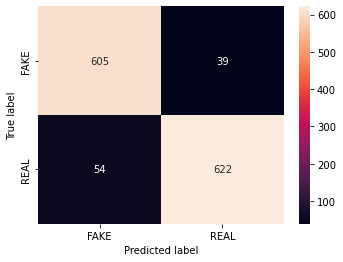


Accuracy:
0.9295454545454546


In [47]:
maxEnt_pos_tag = runModel(encoder,
              train_cv_vector,
              train_cv_label,
              train_holdout_vector,
              train_holdout.label,
              "maxEnt",
              "MaxEnt Classifier on pos-tagged text")
models.loc[len(models)] = maxEnt_pos_tag

In [48]:
df["clean_and_pos_tagged_text"] = df['preprocessed_text'] + ' ' + df['pos_tagged_text']

In [49]:
df.head(1)

,ID,title,text,label,title_and_text,preprocessed_text,pos_tagged_text,clean_and_pos_tagged_text
0,8476,You Can Smell Hillary’s Fear,Daniel Greenfield | a Shillman Journalism Fell...,FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillary’s fear daniel greenfield shillma...,NN-smell JJ-hillary NNP-’ NN-s NN-fear JJ-dani...,smell hillary’s fear daniel greenfield shillma...


In [50]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df, False)

count_vect = CountVectorizer(analyzer = "word")

count_vectorizer = count_vect.fit(df.clean_and_pos_tagged_text)

train_cv_vector = count_vectorizer.transform(train_cv.clean_and_pos_tagged_text)
train_holdout_vector = count_vectorizer.transform(train_holdout.clean_and_pos_tagged_text)
test_vector = count_vectorizer.transform(test.clean_and_pos_tagged_text)


tf_idf = TfidfTransformer(norm="l2")
train_cv_tf_idf = tf_idf.fit_transform(train_cv_vector)
train_holdout_tf_idf = tf_idf.fit_transform(train_holdout_vector)
test_tf_idf = tf_idf.fit_transform(test_vector)  

SVC on preprocessed+pos-tagged TF-IDF weighted text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [10, 100, 500, 1000], 'gamma': [0.0001],
                          'kernel': ['rbf']}])

CV-scores
Accuracy: 0.937 (+/-0.024) for params: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.937 (+/-0.027) for params: {'C': 50, 'kernel': 'linear'}
Accuracy: 0.937 (+/-0.027) for params: {'C': 100, 'kernel': 'linear'}
Accuracy: 0.935 (+/-0.021) for params: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.895 (+/-0.009) for params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.859 (+/-0.015) for params: {'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.590 (+/-0.139) for params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.481 (+/-0.027) for params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


Best Est

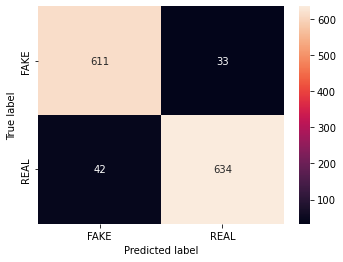


Accuracy:
0.9431818181818182


In [51]:
SVC_tf_idf = runModel(encoder,
               train_cv_tf_idf,
               train_cv_label,
               train_holdout_tf_idf,
               train_holdout.label,
               "svc",
               "SVC on preprocessed+pos-tagged TF-IDF weighted text")
models.loc[len(models)] = SVC_tf_idf

Naiive Bayes on preprocessed+pos-tagged TF-IDF weighted text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=MultinomialNB(), param_grid={})

CV-scores
Accuracy: 0.781 (+/-0.039) for params: {}


Best Estimator Params
MultinomialNB()

Predictions:
['REAL' 'REAL' 'REAL' ... 'REAL' 'REAL' 'REAL']


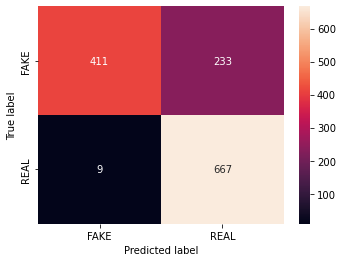


Accuracy:
0.8166666666666667


In [52]:
NB_tf_idf = runModel(encoder,
               train_cv_tf_idf,
               train_cv_label,
               train_holdout_tf_idf,
               train_holdout.label,
              "nb",
              "Naiive Bayes on preprocessed+pos-tagged TF-IDF weighted text")
models.loc[len(models)] = NB_tf_idf

MaxEnt on preprocessed+pos-tagged TF-IDF weighted text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

CV-scores
Accuracy: nan (+/-nan) for params: {'C': 0.001, 'penalty': 'l1'}
Accuracy: 0.554 (+/-0.147) for params: {'C': 0.001, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 0.01, 'penalty': 'l1'}
Accuracy: 0.749 (+/-0.021) for params: {'C': 0.01, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 0.1, 'penalty': 'l1'}
Accuracy: 0.831 (+/-0.023) for params: {'C': 0.1, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.907 (+/-0.004) for params: {'C': 1, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 10, 'penalty': 'l1'}
Accuracy: 0.931 (+/-0.022) for params: {'C': 10, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for

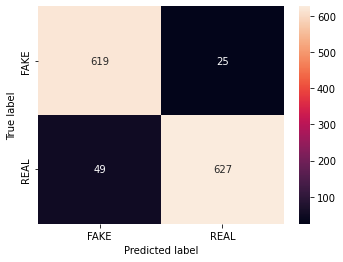


Accuracy:
0.943939393939394


In [53]:
maxEnt_tf_idf = runModel(encoder,
               train_cv_tf_idf,
               train_cv_label,
               train_holdout_tf_idf,
               train_holdout.label,
              "maxEnt",
              "MaxEnt on preprocessed+pos-tagged TF-IDF weighted text")
models.loc[len(models)] = maxEnt_tf_idf

In [54]:
models

,model_name,model_object,score
0,<class 'sklearn.svm._classes.SVC'>,<class 'sklearn.svm._classes.SVC'>,<class 'sklearn.svm._classes.SVC'>
1,Baseline Model 2: Naiive Bayes,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.894697
2,Baseline Model 3: MaxEnt Classifier,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.923485
3,SVC on pos-tagged text,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.915909
4,Naiive Bayes on pos-tagged text,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.897727
5,MaxEnt Classifier on pos-tagged text,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.929545
6,SVC on preprocessed+pos-tagged TF-IDF weighted...,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.943182
7,Naiive Bayes on preprocessed+pos-tagged TF-IDF...,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.816667
8,MaxEnt on preprocessed+pos-tagged TF-IDF weigh...,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.943939


In [55]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df, False)

trigram_vect = CountVectorizer(analyzer = "word", ngram_range=(1,2))

trigram_vect = count_vect.fit(df.clean_and_pos_tagged_text)

train_cv_vector = trigram_vect.transform(train_cv.clean_and_pos_tagged_text)
train_holdout_vector = trigram_vect.transform(train_holdout.clean_and_pos_tagged_text)
test_vector = trigram_vect.transform(test.clean_and_pos_tagged_text)

In [56]:
tf_idf = TfidfTransformer(norm="l2")
train_cv_bigram_tf_idf = tf_idf.fit_transform(train_cv_vector)
train_holdout_bigram_tf_idf = tf_idf.fit_transform(train_holdout_vector)
test_bigram_tf_idf = tf_idf.fit_transform(test_vector)

SVC on bigram vect.+ TF-IDF
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [10, 100, 500, 1000], 'gamma': [0.0001],
                          'kernel': ['rbf']}])

CV-scores
Accuracy: 0.937 (+/-0.024) for params: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.937 (+/-0.027) for params: {'C': 50, 'kernel': 'linear'}
Accuracy: 0.937 (+/-0.027) for params: {'C': 100, 'kernel': 'linear'}
Accuracy: 0.935 (+/-0.021) for params: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.895 (+/-0.009) for params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.859 (+/-0.015) for params: {'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.590 (+/-0.139) for params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.481 (+/-0.027) for params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


Best Estimator Params
SVC(C=10, 

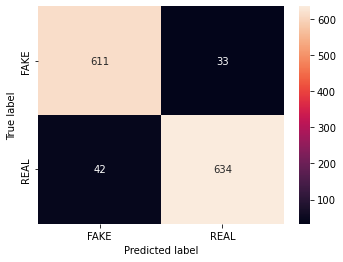


Accuracy:
0.9431818181818182


In [57]:
SVC_trigram_tf_idf = runModel(encoder,
               train_cv_bigram_tf_idf,
               train_cv_label,
               train_holdout_bigram_tf_idf,
               train_holdout.label,
               "svc",
               "SVC on bigram vect.+ TF-IDF")
models.loc[len(models)] = SVC_trigram_tf_idf

In [58]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df, False)

trigram_vect = CountVectorizer(analyzer = "word", ngram_range=(1,3))

trigram_vect = count_vect.fit(df.clean_and_pos_tagged_text)

train_cv_vector = trigram_vect.transform(train_cv.clean_and_pos_tagged_text)
train_holdout_vector = trigram_vect.transform(train_holdout.clean_and_pos_tagged_text)

In [59]:
tf_idf = TfidfTransformer(norm="l2")
train_cv_trigram_tf_idf = tf_idf.fit_transform(train_cv_vector)
train_holdout_trigram_tf_idf = tf_idf.fit_transform(train_holdout_vector)

MaxEnt on trigram vect.+ TF-IDF
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

CV-scores
Accuracy: nan (+/-nan) for params: {'C': 0.001, 'penalty': 'l1'}
Accuracy: 0.554 (+/-0.147) for params: {'C': 0.001, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 0.01, 'penalty': 'l1'}
Accuracy: 0.749 (+/-0.021) for params: {'C': 0.01, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 0.1, 'penalty': 'l1'}
Accuracy: 0.831 (+/-0.023) for params: {'C': 0.1, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.907 (+/-0.004) for params: {'C': 1, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 10, 'penalty': 'l1'}
Accuracy: 0.931 (+/-0.022) for params: {'C': 10, 'penalty': 'l2'}
Accuracy: nan (+/-nan) for params: {'C': 100, 'pe

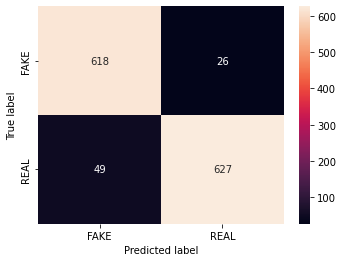


Accuracy:
0.9431818181818182


In [60]:
maxEnt_tf_idf = runModel(encoder,
               train_cv_trigram_tf_idf,
               train_cv_label,
               train_holdout_trigram_tf_idf,
               train_holdout.label,
              "maxEnt",
              "MaxEnt on trigram vect.+ TF-IDF")
models.loc[len(models)] = maxEnt_tf_idf

In [61]:
models

,model_name,model_object,score
0,<class 'sklearn.svm._classes.SVC'>,<class 'sklearn.svm._classes.SVC'>,<class 'sklearn.svm._classes.SVC'>
1,Baseline Model 2: Naiive Bayes,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.894697
2,Baseline Model 3: MaxEnt Classifier,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.923485
3,SVC on pos-tagged text,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.915909
4,Naiive Bayes on pos-tagged text,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.897727
5,MaxEnt Classifier on pos-tagged text,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.929545
6,SVC on preprocessed+pos-tagged TF-IDF weighted...,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.943182
7,Naiive Bayes on preprocessed+pos-tagged TF-IDF...,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.816667
8,MaxEnt on preprocessed+pos-tagged TF-IDF weigh...,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.943939
9,SVC on bigram vect.+ TF-IDF,"GridSearchCV(cv=ShuffleSplit(n_splits=5, rando...",0.943182


In [62]:
test = pd.read_csv("fake_or_real_news_test.csv")
train = pd.read_csv("fake_or_real_news_training_CLEANED.csv")

In [63]:
train['title_and_text'] = train['title'] +' '+ train['text']
train['preprocessed_text'] = train['title_and_text'].apply(lambda x: preprocess(x))

In [64]:
test['title_and_text'] = test['title'] +' '+ test['text']
test['preprocessed_text'] = test['title_and_text'].apply(lambda x: preprocess(x))

In [65]:
test.head()

,ID,title,text,title_and_text,preprocessed_text
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...,September New Homes Sales Rise——-Back To 1992 ...,september new home sale rise——-back level sept...
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...,Why The Obamacare Doomsday Cult Can't Admit It...,obamacare doomsday cult can't admit wrong cong...
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...,"Sanders, Cruz resist pressure after NY losses,...",sander cruz resist pressure ny loss vow fight ...
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...,Surviving escaped prisoner likely fatigued and...,survive escape prisoner likely fatigue prone m...
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...,Clinton and Sanders neck and neck in Californi...,clinton sander neck neck california primary ma...


In [66]:
train.to_csv("fake_or_real_news_train_PREPROCESSED.csv", index=False)

In [67]:
test.to_csv("fake_or_real_news_test_PREPROCESSED.csv", index=False)

In [68]:
train = pd.read_csv("fake_or_real_news_train_PREPROCESSED.csv")
train = train.astype(object).replace(np.nan, 'None')

test = pd.read_csv("fake_or_real_news_test_PREPROCESSED.csv")
test = test.astype(object).replace(np.nan, 'None')

In [69]:
test = test.astype(object).replace(np.nan, 'None')

In [70]:
test.head()

,ID,title,text,title_and_text,preprocessed_text
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...,September New Homes Sales Rise——-Back To 1992 ...,september new home sale rise——-back level sept...
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...,Why The Obamacare Doomsday Cult Can't Admit It...,obamacare doomsday cult can't admit wrong cong...
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...,"Sanders, Cruz resist pressure after NY losses,...",sander cruz resist pressure ny loss vow fight ...
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...,Surviving escaped prisoner likely fatigued and...,survive escape prisoner likely fatigue prone m...
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...,Clinton and Sanders neck and neck in Californi...,clinton sander neck neck california primary ma...


In [71]:
train.head()

,ID,title,text,label,X1,X2,title_and_text,preprocessed_text
0,8476,You Can Smell Hillary’s Fear,Daniel Greenfield | a Shillman Journalism Fell...,FAKE,None,None,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillary’s fear daniel greenfield shillma...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,None,None,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan commit political ...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,None,None,Kerry to go to Paris in gesture of sympathy U....,kerry go paris gesture sympathy u.s secretary ...
3,10142,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King (@KaydeeKing) November 9 | 2016 ...,FAKE,None,None,Bernie supporters on Twitter erupt in anger ag...,bernie supporter twitter erupt anger dnc try w...
4,875,The Battle of New York: Why This Primary Matte...,"Cruz promised his supporters. """"We're beating...",REAL,None,None,The Battle of New York: Why This Primary Matte...,battle new york primary matter primary day new...


In [72]:
train['pos_tagged_text'] = train['preprocessed_text'].apply(lambda x: pos_tag_words(x))
test['pos_tagged_text'] = test['preprocessed_text'].apply(lambda x: pos_tag_words(x))

In [73]:
train["clean_and_pos_tagged_text"] = train['preprocessed_text'] + ' ' + train['pos_tagged_text']
test["clean_and_pos_tagged_text"] = test['preprocessed_text'] + ' ' + train['pos_tagged_text']

In [74]:
test.head(1)

,ID,title,text,title_and_text,preprocessed_text,pos_tagged_text,clean_and_pos_tagged_text
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...,September New Homes Sales Rise——-Back To 1992 ...,september new home sale rise——-back level sept...,VB-september JJ-new NN-home NN-sale JJ-rise——-...,september new home sale rise——-back level sept...


In [75]:
from sklearn.pipeline import Pipeline
trigram_vectorizer = CountVectorizer(analyzer = "word", ngram_range=(1,3))
tf_idf = TfidfTransformer(norm="l2")
classifier = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

pipeline = Pipeline([
     ('trigram_vectorizer', trigram_vectorizer),
     ('tfidf', tf_idf),
     ('clf', classifier),
 ])

In [76]:
pipeline.fit(train.clean_and_pos_tagged_text, encoder.fit_transform(train.label.values))

Pipeline(steps=[('trigram_vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(C=1000, multi_class='multinomial',
                                    solver='saga'))])

In [77]:
import pickle
pickle.dump( pipeline, open( "pipeline.pkl", "wb" ) )

In [78]:
print(colored("Predicting on test", 'blue'))
test_predictions = test_predictions = pipeline.predict(test.clean_and_pos_tagged_text)


Predicting on test


In [79]:
test_predictions

array([0, 0, 1, ..., 1, 1, 1])

In [80]:
test_predictions_decoded = encoder.inverse_transform( test_predictions )

In [81]:
predictions = test
predictions["label"] = test_predictions_decoded

In [82]:
predictions.shape

(2321, 8)

In [83]:
predictions.head()

,ID,title,text,title_and_text,preprocessed_text,pos_tagged_text,clean_and_pos_tagged_text,label
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...,September New Homes Sales Rise——-Back To 1992 ...,september new home sale rise——-back level sept...,VB-september JJ-new NN-home NN-sale JJ-rise——-...,september new home sale rise——-back level sept...,FAKE
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...,Why The Obamacare Doomsday Cult Can't Admit It...,obamacare doomsday cult can't admit wrong cong...,NN-obamacare NN-doomsday NN-cult MD-ca RB-n't ...,obamacare doomsday cult can't admit wrong cong...,FAKE
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...,"Sanders, Cruz resist pressure after NY losses,...",sander cruz resist pressure ny loss vow fight ...,NN-sander NNS-cruz VBP-resist NN-pressure JJ-n...,sander cruz resist pressure ny loss vow fight ...,REAL
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...,Surviving escaped prisoner likely fatigued and...,survive escape prisoner likely fatigue prone m...,JJ-survive NN-escape NN-prisoner JJ-likely NN-...,survive escape prisoner likely fatigue prone m...,REAL
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...,Clinton and Sanders neck and neck in Californi...,clinton sander neck neck california primary ma...,NN-clinton NN-sander NN-neck NN-neck NN-califo...,clinton sander neck neck california primary ma...,REAL


In [84]:
predictions.label.describe()

count     2321
unique       2
top       REAL
freq      1340
Name: label, dtype: object

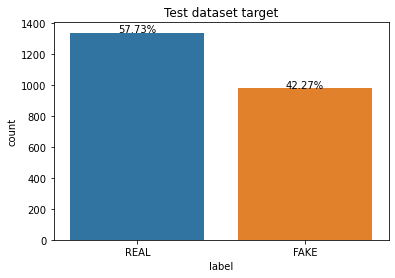

In [85]:
import collections
ax = sns.countplot(predictions.label,
                order=[x for x, count in sorted(collections.Counter(predictions.label).items(),
                key=lambda x: -x[1])])


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(predictions)*100),
            ha="center") 
ax.set_title("Test dataset target")
show()

In [86]:
predictions.drop(columns=["title","text","title_and_text","preprocessed_text","pos_tagged_text","clean_and_pos_tagged_text"]).head()

,ID,label
0,10498,FAKE
1,2439,FAKE
2,864,REAL
3,4128,REAL
4,662,REAL


In [87]:
predictions.to_csv("TEST_PREDICTIONS.csv", index=False)